In [16]:
import pandas as pd

df = pd.read_csv('C:/Users/71477/OneDrive - PT. Federal International Finance/External Class Training/Data Analytics/data/datasets/Iris.csv')
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [17]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [19]:
# Menambahkan data outlier
df.loc[len(df)] = [len(df)+1, 15.0, 9.0, 12.0, 8.0, 'Iris-setosa']
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica
150,151,15.0,9.0,12.0,8.0,Iris-setosa


In [21]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,151.000000,151.000000,151.000000,151.000000,151.000000
mean,76.000000,5.903974,3.093377,3.813245,1.243709
std,43.734045,1.111928,0.648760,1.882080,0.940679
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.500000,5.100000,2.800000,1.600000,0.300000
50%,76.000000,5.800000,3.000000,4.400000,1.300000
75%,113.500000,6.400000,3.300000,5.100000,1.800000
max,151.000000,15.000000,9.000000,12.000000,8.000000


In [8]:
# Mean
def mean(data):
    total = 0
    count = 0
    
    for value in data:
        total += value
        count += 1
    
    if count == 0:
        return None  # Hindari pembagian nol
    
    mean = total / count
    return mean

In [20]:
# Menghitung Rata-Rata dari setiap feature
print('Mean Sepal Length (cm) = ', mean(df['SepalLengthCm']))
print('Mean Sepal Width (cm) = ', mean(df['SepalWidthCm']))
print('Mean Petal Length (cm) = ', mean(df['PetalLengthCm']))
print('Mean Petal Width (cm) = ', mean(df['PetalWidthCm']))

Mean Sepal Length (cm) =  5.903973509933777
Mean Sepal Width (cm) =  3.0933774834437093
Mean Petal Length (cm) =  3.8132450331125853
Mean Petal Width (cm) =  1.2437086092715237


In [23]:
# Mencari nilai tengah atau median dari sebuah data
def median(data):

    sorted_data = sorted(data) #data harus diurutkan terlebih dahulu
    n = len(sorted_data) #jumlah data
    middle_value = n // 2
    
    if n % 2 == 0: #Jika jumlah data genap
        return (sorted_data[middle_value - 1] + sorted_data[middle_value]) / 2
    
    else: # Jika jumlah data ganjil, langsung mengambil nilai tengah
        return sorted_data[middle_value]


In [24]:
# Mencari median dari setiap feature
print('Median Sepal Length (cm) = ', median(df['SepalLengthCm']))
print('Median Sepal Width (cm) = ', median(df['SepalWidthCm']))
print('Median Petal Length (cm) = ', median(df['PetalLengthCm']))
print('Median Petal Width (cm) = ', median(df['PetalWidthCm']))

Median Sepal Length (cm) =  5.8
Median Sepal Width (cm) =  3.0
Median Petal Length (cm) =  4.4
Median Petal Width (cm) =  1.3


In [ ]:
def mode(data):
    
    count = {} # Dictionary kosong untuk menyimpan key dan value; kalo list hanya menyimpan value saja
    
    for value in data:
        if value in count:
            count[value] += 1 #setiap value sama di simpan di variable count
        else:
            count[value] = 1

    # Mencari jumlah count terbesar
    max_count = max(count.values())
    
    # Mengambil semua nilai yang memiliki frekuensi maksimum
    modes = [key for key, value in count.items() if value == max_count]
    
    if len(modes) == 1:
        return modes[0]  # hanya satu modus
    else:
        return modes      # multipe modus


In [ ]:
# Mencari modus dari setiap feature
print('Modus Sepal Length (cm) = ', mode(df['SepalLengthCm']))
print('Modus Sepal Width (cm) = ', mode(df['SepalWidthCm']))
print('Modus Petal Length (cm) = ', mode(df['PetalLengthCm']))
print('Modus Petal Width (cm) = ', mode(df['PetalWidthCm']))

Modus Sepal Length (cm) =  5.0
Modus Sepal Width (cm) =  3.0
Modus Petal Length (cm) =  1.5
Modus Petal Width (cm) =  0.2


In [ ]:
# Validasi hasil perhitungan manual
import statistics as st
print('Modus Sepal Length (cm) = ', st.mode(df['SepalLengthCm']))
print('Modus Sepal Width (cm) = ', st.mode(df['SepalWidthCm']))
print('Modus Petal Length (cm) = ', st.mode(df['PetalLengthCm']))
print('Modus Petal Width (cm) = ', st.mode(df['PetalWidthCm']))

Modus Sepal Length (cm) =  5.0
Modus Sepal Width (cm) =  3.0
Modus Petal Length (cm) =  1.5
Modus Petal Width (cm) =  0.2


In [31]:
def variance_population(data):
    
    n = len(data) 

    # Hitung mean (rata-rata)
    mean_value = mean(data)

    # Hitung jumlah kuadrat selisih dari mean
    total_squared_diff = 0
    for value in data:
        total_squared_diff += (value - mean_value) ** 2

    # Bagi dengan n (karena ini populasi)
    variance = total_squared_diff / n
    return variance


In [32]:
# Mencari variansi dari setiap feature
print('Variansi Sepal Length (cm) = ', variance_population(df['SepalLengthCm']))
print('Variansi Sepal Width (cm) = ', variance_population(df['SepalWidthCm']))
print('Variansi Petal Length (cm) = ', variance_population(df['PetalLengthCm']))
print('Variansi Petal Width (cm) = ', variance_population(df['PetalWidthCm']))

Variansi Sepal Length (cm) =  1.2281961317486076
Variansi Sepal Width (cm) =  0.41810183763869985
Variansi Petal Length (cm) =  3.518764966448841
Variansi Petal Width (cm) =  0.8790167097934297


In [ ]:
# Validasi hasil
import numpy as np
print('Variansi Sepal Length (cm) = ', np.var(df['SepalLengthCm']))
print('Variansi Sepal Width (cm) = ', np.var(df['SepalWidthCm']))
print('Variansi Petal Length (cm) = ', np.var(df['PetalLengthCm']))
print('Variansi Petal Width (cm) = ', np.var(df['PetalWidthCm']))

Variansi Sepal Length (cm) =  1.2281961317486074
Variansi Sepal Width (cm) =  0.4181018376387002
Variansi Petal Length (cm) =  3.51876496644884
Variansi Petal Width (cm) =  0.8790167097934302


In [35]:
def ptp(data):

    if len(data) == 0:
        return None  # Tidak bisa hitung jika data kosong

    min_val = data[0]
    max_val = data[0]

    for val in data:
        if val < min_val:
            min_val = val
        if val > max_val:
            max_val = val

    return max_val - min_val

In [ ]:
# Menghitung nilai peak to peak
print('Variansi Sepal Length (cm) = ', ptp(df['SepalLengthCm']))
print('Variansi Sepal Width (cm) = ', ptp(df['SepalWidthCm']))
print('Variansi Petal Length (cm) = ', ptp(df['PetalLengthCm']))
print('Variansi Petal Width (cm) = ', ptp(df['PetalWidthCm']))

Variansi Sepal Length (cm) =  10.7
Variansi Sepal Width (cm) =  7.0
Variansi Petal Length (cm) =  11.0
Variansi Petal Width (cm) =  7.9


In [ ]:
# Validasi nilai peak to peak menggunakan function 
print('Variansi Sepal Length (cm) = ', np.ptp(df['SepalLengthCm']))
print('Variansi Sepal Width (cm) = ', np.ptp(df['SepalWidthCm']))
print('Variansi Petal Length (cm) = ', np.ptp(df['PetalLengthCm']))
print('Variansi Petal Width (cm) = ', np.ptp(df['PetalWidthCm']))

Variansi Sepal Length (cm) =  10.7
Variansi Sepal Width (cm) =  7.0
Variansi Petal Length (cm) =  11.0
Variansi Petal Width (cm) =  7.9


In [65]:
def v_iqr(data):

    sorted_data = sorted(data)
    n = len(sorted_data)

    def get_percentile(p):
        pos = p * (n + 1) / 100
        k = int(pos) - 1  # karena index di Python dimulai dari 0
        f = pos - int(pos)

        if k < 0:
            return sorted_data[0]
        elif k + 1 >= n:
            return sorted_data[-1]
        else:
            # interpolasi antara posisi k dan k+1
            return sorted_data[k] + f * (sorted_data[k + 1] - sorted_data[k])

    q1 = get_percentile(25)
    q3 = get_percentile(75)
    v_iqr = q3 - q1

    return q1,q3,v_iqr

In [66]:
# Menentukan range
print('Range Sepal Length (Q1, Q3, IQR) = ', v_iqr(df['SepalLengthCm']))
print('Range Sepal Width (Q1, Q3, IQR) = ', v_iqr(df['SepalWidthCm']))
print('Range Petal Length (Q1, Q3, IQR) = ', v_iqr(df['PetalLengthCm']))
print('Range Petal Width (Q1, Q3, IQR) = ', v_iqr(df['PetalWidthCm']))

Range Sepal Length (Q1, Q3, IQR) =  (5.1, 6.4, 1.3000000000000007)
Range Sepal Width (Q1, Q3, IQR) =  (2.8, 3.3, 0.5)
Range Petal Length (Q1, Q3, IQR) =  (1.6, 5.1, 3.4999999999999996)
Range Petal Width (Q1, Q3, IQR) =  (0.3, 1.8, 1.5)


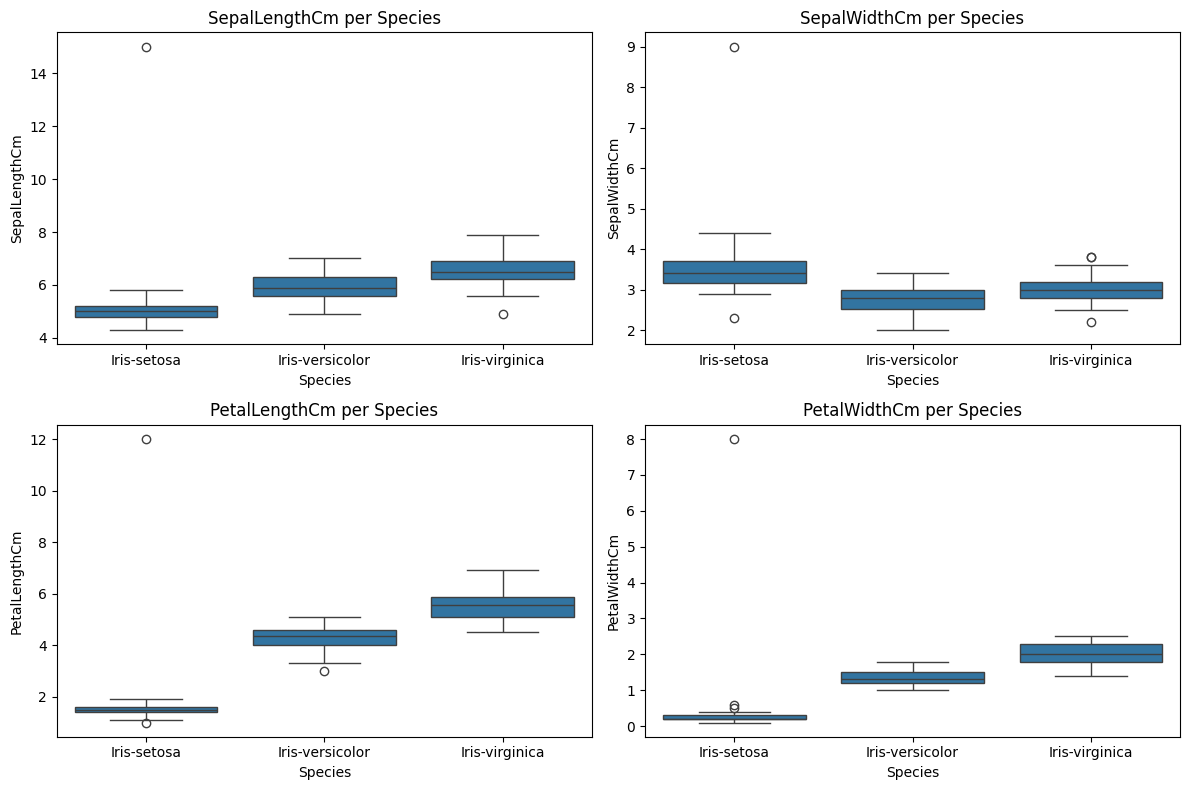

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
for i, col in enumerate(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Species', y=col, data=df)
    plt.title(f'{col} per Species')
plt.tight_layout()
plt.show()
# Dapat dilihat bahwa hasil boxplot menunjukkan adanya data outlier (hasil manipulasi)

In [ ]:
# Mencari nilai outlier dari data Septal Length 
q1, q3, iqr = v_iqr(df['SepalLengthCm'].tolist())

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df.loc[
    (df['SepalLengthCm'] < lower_bound) |
    (df['SepalLengthCm'] > upper_bound) ]
print(outliers)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
150  151           15.0           9.0           12.0           8.0   

         Species  
150  Iris-setosa  


In [71]:
# Ditemukan data outlier di index 150 sehingga index tersebut dapat di drop
df = df.drop(index=150)
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
# Menghitung Rata-Rata dari setiap feature tanpa data outlier
print('Mean Sepal Length (cm) = ', mean(df['SepalLengthCm']))
print('Mean Sepal Width (cm) = ', mean(df['SepalWidthCm']))
print('Mean Petal Length (cm) = ', mean(df['PetalLengthCm']))
print('Mean Petal Width (cm) = ', mean(df['PetalWidthCm']))

Mean Sepal Length (cm) =  5.843333333333335
Mean Sepal Width (cm) =  3.0540000000000007
Mean Petal Length (cm) =  3.7586666666666693
Mean Petal Width (cm) =  1.1986666666666672


In [74]:
# Mencari median dari setiap feature tanpa data outlier
print('Median Sepal Length (cm) = ', median(df['SepalLengthCm']))
print('Median Sepal Width (cm) = ', median(df['SepalWidthCm']))
print('Median Petal Length (cm) = ', median(df['PetalLengthCm']))
print('Median Petal Width (cm) = ', median(df['PetalWidthCm']))

Median Sepal Length (cm) =  5.8
Median Sepal Width (cm) =  3.0
Median Petal Length (cm) =  4.35
Median Petal Width (cm) =  1.3


In [78]:
# Mencari modus dari setiap feature tanpa data outlier
print('Modus Sepal Length (cm) = ', mode(df['SepalLengthCm']))
print('Modus Sepal Width (cm) = ', mode(df['SepalWidthCm']))
print('Modus Petal Length (cm) = ', mode(df['PetalLengthCm']))
print('Modus Petal Width (cm) = ', mode(df['PetalWidthCm']))

Modus Sepal Length (cm) =  5.0
Modus Sepal Width (cm) =  3.0
Modus Petal Length (cm) =  1.5
Modus Petal Width (cm) =  0.2


In [77]:
# Mencari variansi dari setiap feature
print('Variansi Sepal Length (cm) = ', variance_population(df['SepalLengthCm']))
print('Variansi Sepal Width (cm) = ', variance_population(df['SepalWidthCm']))
print('Variansi Petal Length (cm) = ', variance_population(df['PetalLengthCm']))
print('Variansi Petal Width (cm) = ', variance_population(df['PetalWidthCm']))

Variansi Sepal Length (cm) =  0.6811222222222222
Variansi Sepal Width (cm) =  0.1867506666666667
Variansi Petal Length (cm) =  3.0924248888888854
Variansi Petal Width (cm) =  0.5785315555555559


In [76]:
# Menghitung nilai peak to peak
print('Variansi Sepal Length (cm) = ', ptp(df['SepalLengthCm']))
print('Variansi Sepal Width (cm) = ', ptp(df['SepalWidthCm']))
print('Variansi Petal Length (cm) = ', ptp(df['PetalLengthCm']))
print('Variansi Petal Width (cm) = ', ptp(df['PetalWidthCm']))

Variansi Sepal Length (cm) =  3.6000000000000005
Variansi Sepal Width (cm) =  2.4000000000000004
Variansi Petal Length (cm) =  5.9
Variansi Petal Width (cm) =  2.4


In [75]:
# Menentukan range
print('Range Sepal Length (Q1, Q3, IQR) = ', v_iqr(df['SepalLengthCm']))
print('Range Sepal Width (Q1, Q3, IQR) = ', v_iqr(df['SepalWidthCm']))
print('Range Petal Length (Q1, Q3, IQR) = ', v_iqr(df['PetalLengthCm']))
print('Range Petal Width (Q1, Q3, IQR) = ', v_iqr(df['PetalWidthCm']))

Range Sepal Length (Q1, Q3, IQR) =  (5.1, 6.4, 1.3000000000000007)
Range Sepal Width (Q1, Q3, IQR) =  (2.8, 3.3, 0.5)
Range Petal Length (Q1, Q3, IQR) =  (1.5750000000000002, 5.1, 3.5249999999999995)
Range Petal Width (Q1, Q3, IQR) =  (0.3, 1.8, 1.5)
